In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data_raw=pd.read_csv('./data/BRCA1_HUMAN_Findlay_2018.csv')
data_raw.head(5)

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0


In [27]:
data_raw.shape

(1837, 4)

In [28]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0
...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1


In [30]:
df=data_raw.copy()




In [31]:
df['position']=df['mutant'].apply(get_number_from_text)


In [32]:
df.head()

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1


In [29]:
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]
    

In [33]:
get_number_from_text('A10B')

'10'

In [34]:
df

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1
...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855


In [35]:
df_g = df.groupby(by=['position', 'DMS_score_bin']).apply(lambda x: x['DMS_score_bin'] == 1)

In [36]:
df_g

position  DMS_score_bin     
1         0              0      False
                         1      False
                         2      False
                         3      False
                         4      False
                                ...  
98        1              566     True
                         567     True
                         568     True
                         570     True
99        1              571     True
Name: DMS_score_bin, Length: 1837, dtype: bool

In [37]:
dms_scores = data_raw['DMS_score']


(array([  6.,  12.,  11.,  18.,  39.,  51.,  76.,  84.,  73.,  54.,  61.,
         83., 157., 267., 416., 331.,  76.,  18.,   2.,   2.]),
 array([-3.71822115, -3.46696549, -3.21570983, -2.96445417, -2.7131985 ,
        -2.46194284, -2.21068718, -1.95943152, -1.70817586, -1.45692019,
        -1.20566453, -0.95440887, -0.70315321, -0.45189755, -0.20064188,
         0.05061378,  0.30186944,  0.5531251 ,  0.80438076,  1.05563643,
         1.30689209]),
 <BarContainer object of 20 artists>)

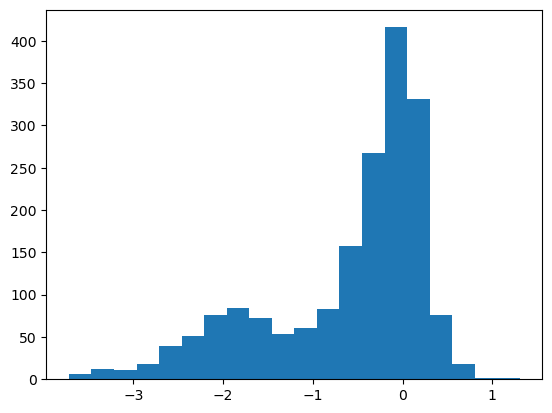

In [26]:
plt.hist(dms_scores, bins=20)

Text(0.5, 1.0, 'Histogram of DMS Scores')

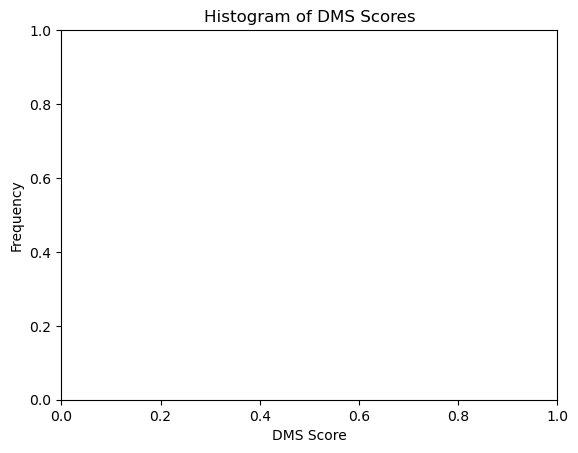

In [38]:
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Histogram of DMS Scores')

In [28]:
plt.show()

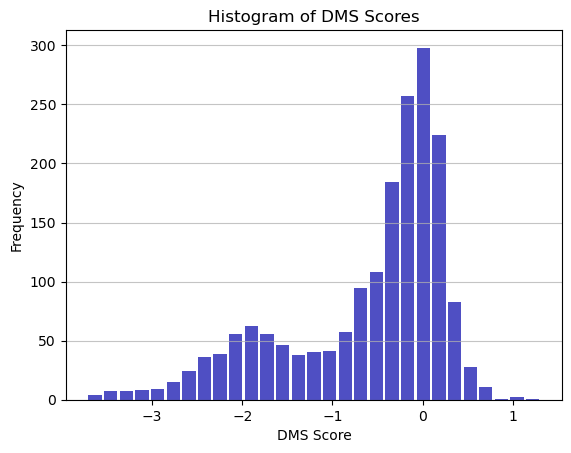

In [39]:
n, bins, patches = plt.hist(x=dms_scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

# Add labels and title
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Histogram of DMS Scores')

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Show the histogram
plt.show()

In [54]:
data_pivot = data_raw.pivot(index='mutant', columns='position', values='DMS_score')

In [41]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [42]:
position = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..., 1855, 1855, 1855, 1855, 1855]  # replace with your own data

In [43]:
position_df = pd.DataFrame({'position': position})

In [45]:
data_with_position = pd.concat([data_raw, position_df], axis=1)

In [46]:
print(data_with_position.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [49]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin'], dtype='object')


In [51]:
data_raw['position'] = data_raw['mutant'].str.extract('(\d+)').astype(int)

In [52]:
print(data_raw.head())

  mutant                                   mutated_sequence  DMS_score  \
0    M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1    M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2    M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3    M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4    M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   

   DMS_score_bin  position  
0              0         1  
1              0         1  
2              0         1  
3              0         1  
4              0         1  


In [53]:
print(data_raw.columns)

Index(['mutant', 'mutated_sequence', 'DMS_score', 'DMS_score_bin', 'position'], dtype='object')


In [66]:
data_pivot = data_raw.pivot(index='mutant', columns='position', values='DMS_score_normalized')

<Axes: xlabel='position', ylabel='mutant'>

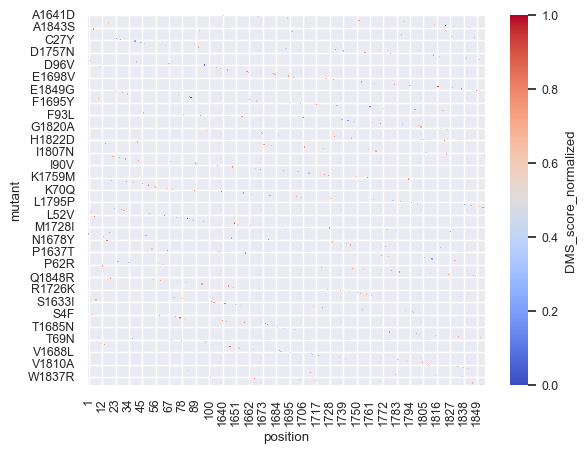

In [67]:
sns.heatmap(data_pivot, cmap='coolwarm', cbar_kws={'label': 'DMS_score_normalized'})

In [57]:
import seaborn as sns

Text(0, 0.5, 'Mutant')

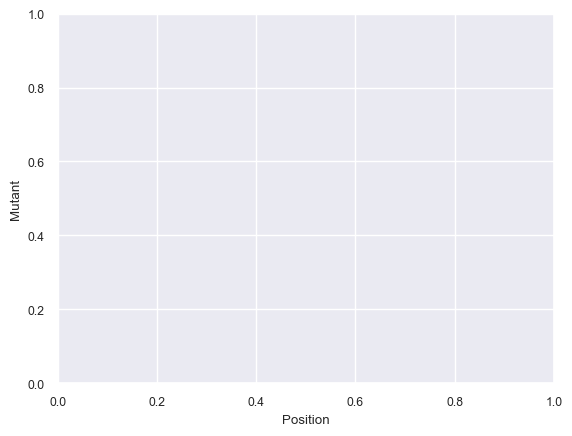

In [68]:
sns.set(font_scale=0.8)
plt.xlabel('Position')
plt.ylabel('Mutant')

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
data_raw['DMS_score_normalized'] = scaler.fit_transform(data_raw[['DMS_score']])

In [65]:
print(data_raw)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  position  DMS_score_normalized  
0        

In [69]:
data_raw['dms_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].min()) / (data_raw['DMS_score'].max() - data_raw['DMS_score'].min())

In [70]:
data_pivot = data_raw.pivot(index='mutant', columns='position', values='dms_score_normalized')


Text(0.5, 1.0, 'DMS Score Normalized Heatmap')

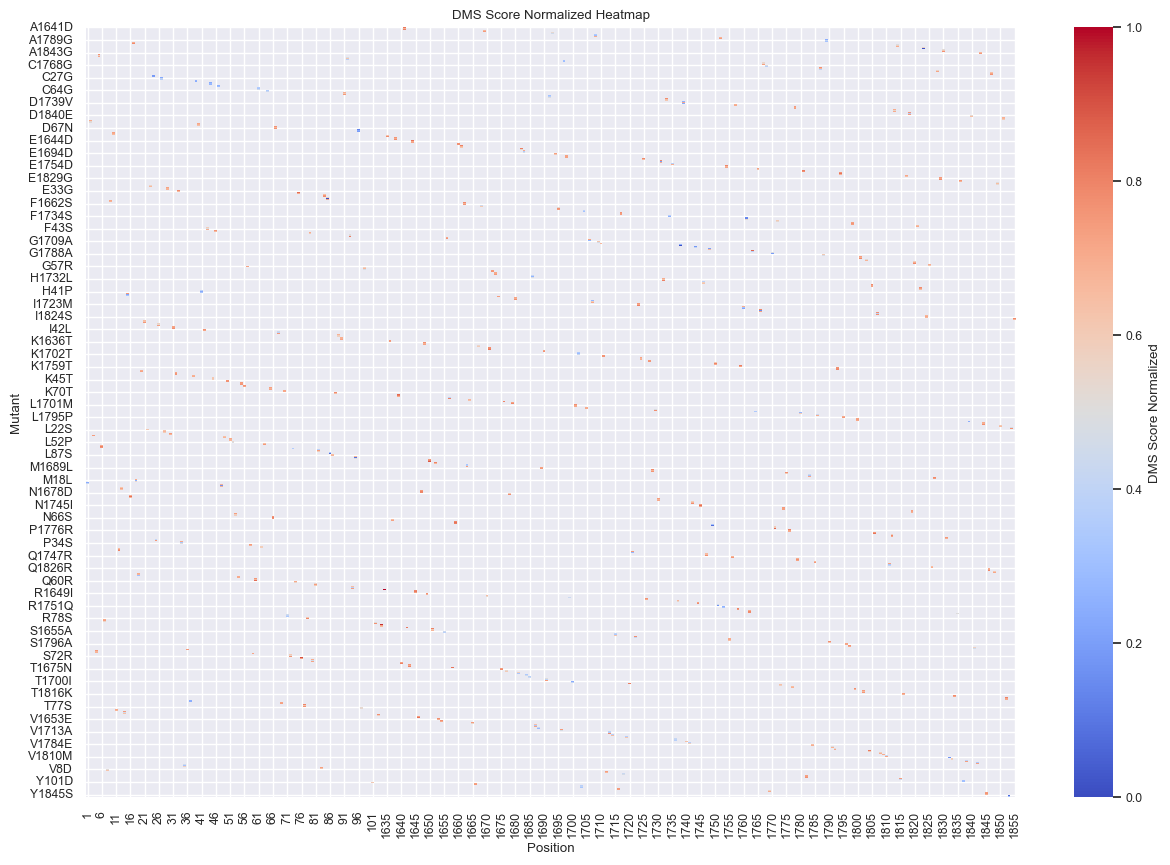

In [71]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_pivot, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'DMS Score Normalized'})
plt.xlabel('Position')
plt.ylabel('Mutant')
plt.title('DMS Score Normalized Heatmap')

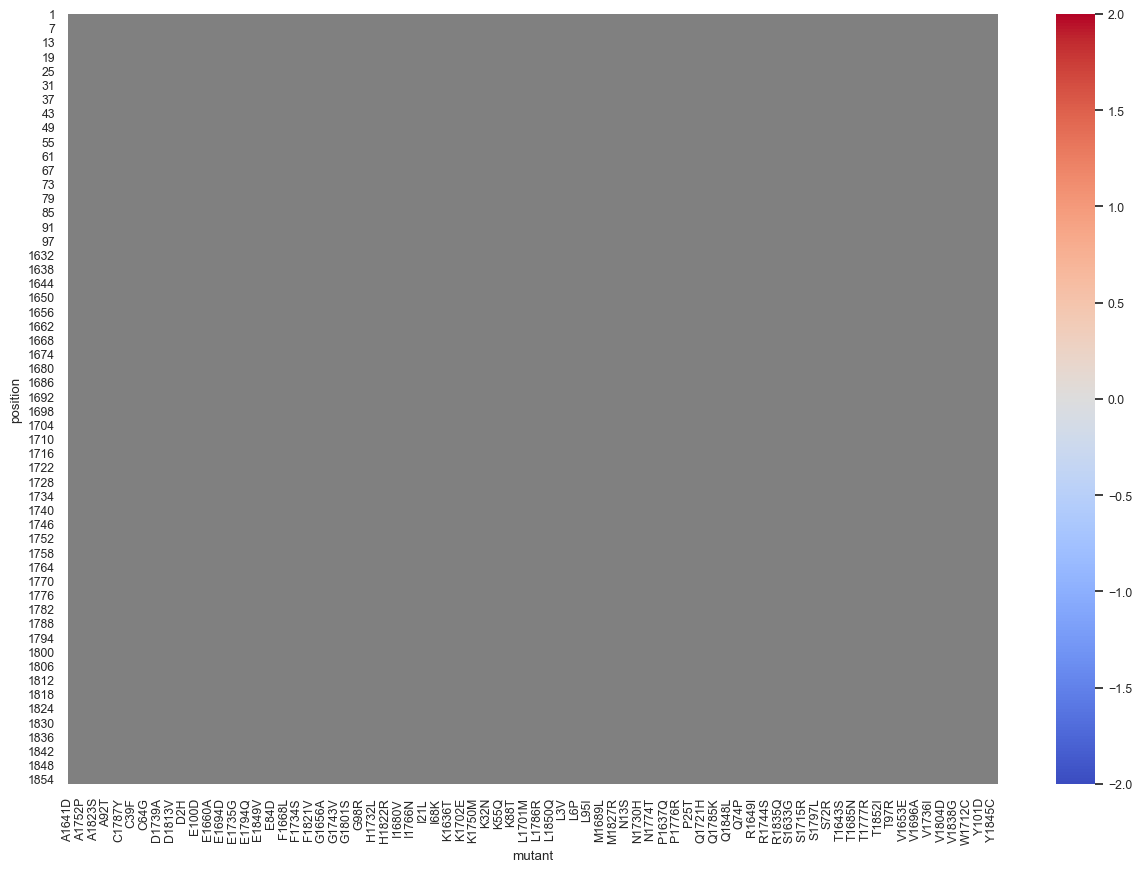

In [73]:

data_raw['DMS_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].mean()) / data_raw['DMS_score'].std()

# create a pivot table
pivot = data_raw.pivot_table(index='position', columns='mutant', values='DMS_score_normalized')

# plot the heatmap
sns.set(font_scale=0.8)
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot, cmap='coolwarm', center=0, annot=False, linewidths=.5, linecolor='gray', fmt=".2f", vmax=2, vmin=-2)
plt.show()

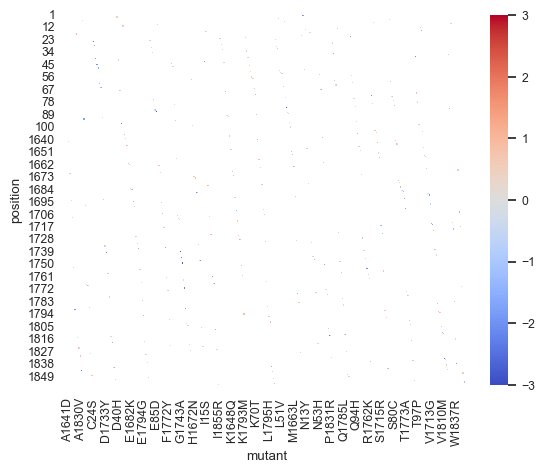

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# normalize the DMS score column
data_raw['DMS_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].mean()) / data_raw['DMS_score'].std()

# create a pivot table
pivot_table = data_raw.pivot(index='position', columns='mutant', values='DMS_score_normalized')

# create the heatmap with a specified color scale
sns.heatmap(pivot_table, cmap='coolwarm', center=0, vmin=-3, vmax=3)

plt.show()

In [75]:
pivot = data.pivot('position', 'mutant', 'DMS_score_normalized')

# Set the color scheme
cmap = sns.diverging_palette(10, 220, sep=80, n=7)

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pivot, cmap=cmap, annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add labels to the axes
ax.set_xlabel('Mutant')
ax.set_ylabel('Position')

# Show the plot
plt.show()

NameError: name 'data' is not defined

/var/folders/px/t7c4vv9555gc6_5d200h7fmr0000gn/T/ipykernel_13053/2890909158.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = data_raw.pivot('position', 'mutant', 'DMS_score_normalized')


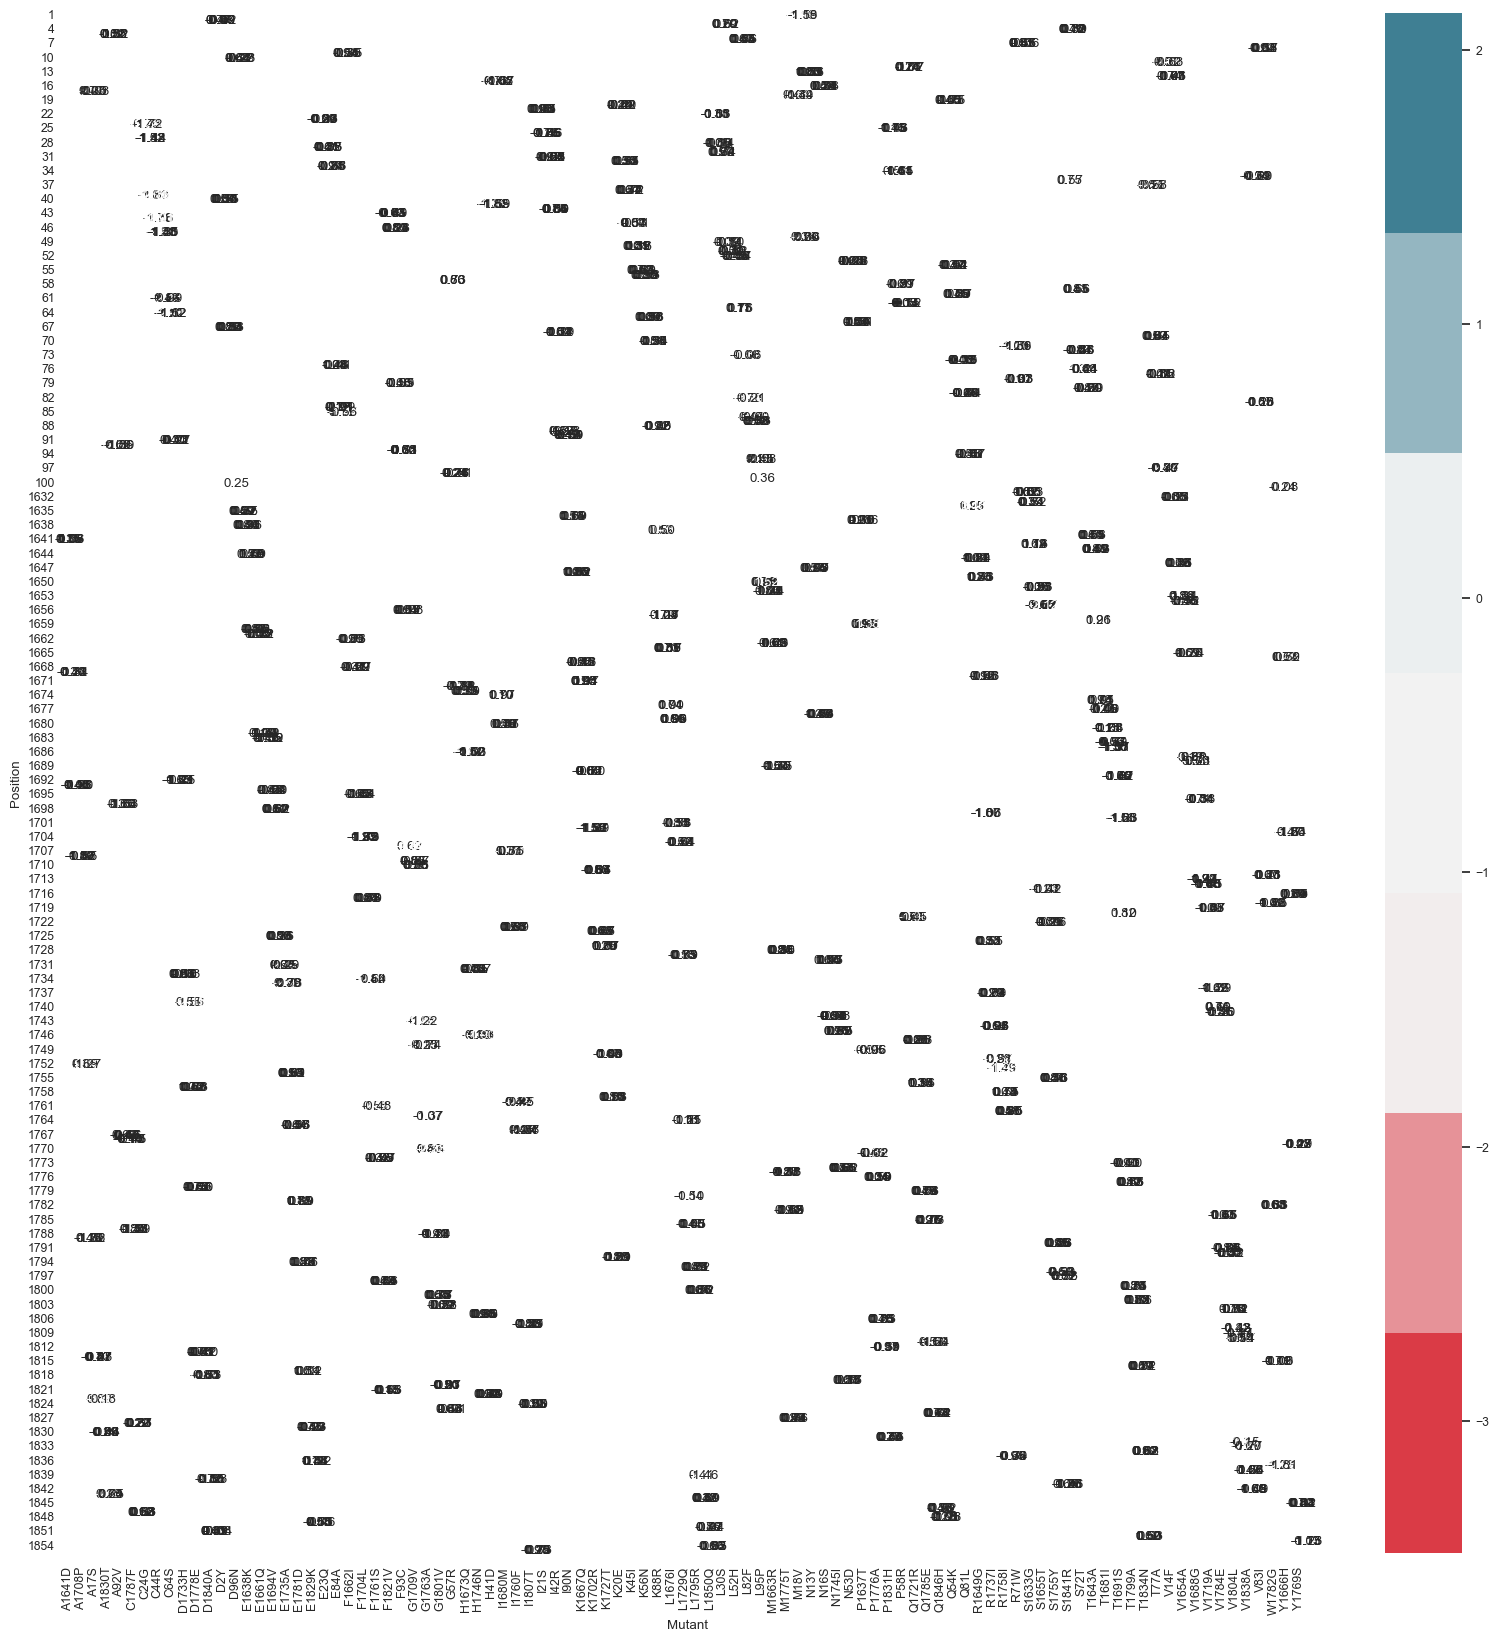

In [78]:
data_raw['DMS_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].mean()) / data_raw['DMS_score'].std()

# Pivot the table to create a heatmap
pivot = data_raw.pivot('position', 'mutant', 'DMS_score_normalized')

# Set the color scheme
cmap = sns.diverging_palette(10, 220, sep=80, n=7)

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pivot, cmap=cmap, annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add labels to the axes
ax.set_xlabel('Mutant')
ax.set_ylabel('Position')

# Show the plot
plt.show()

<Axes: xlabel='position', ylabel='mutant'>

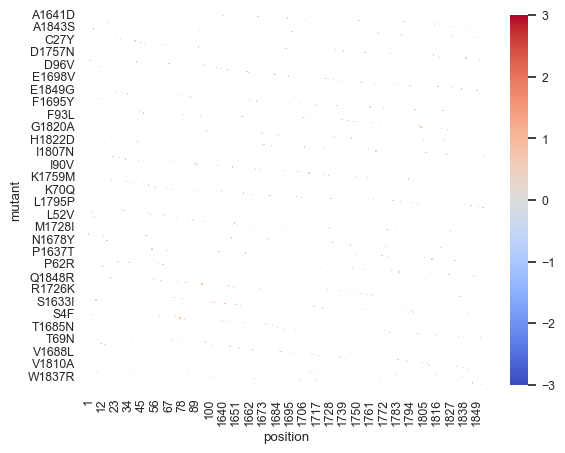

In [79]:
sns.heatmap(data_pivot, cmap="coolwarm", vmin=-3, vmax=3)

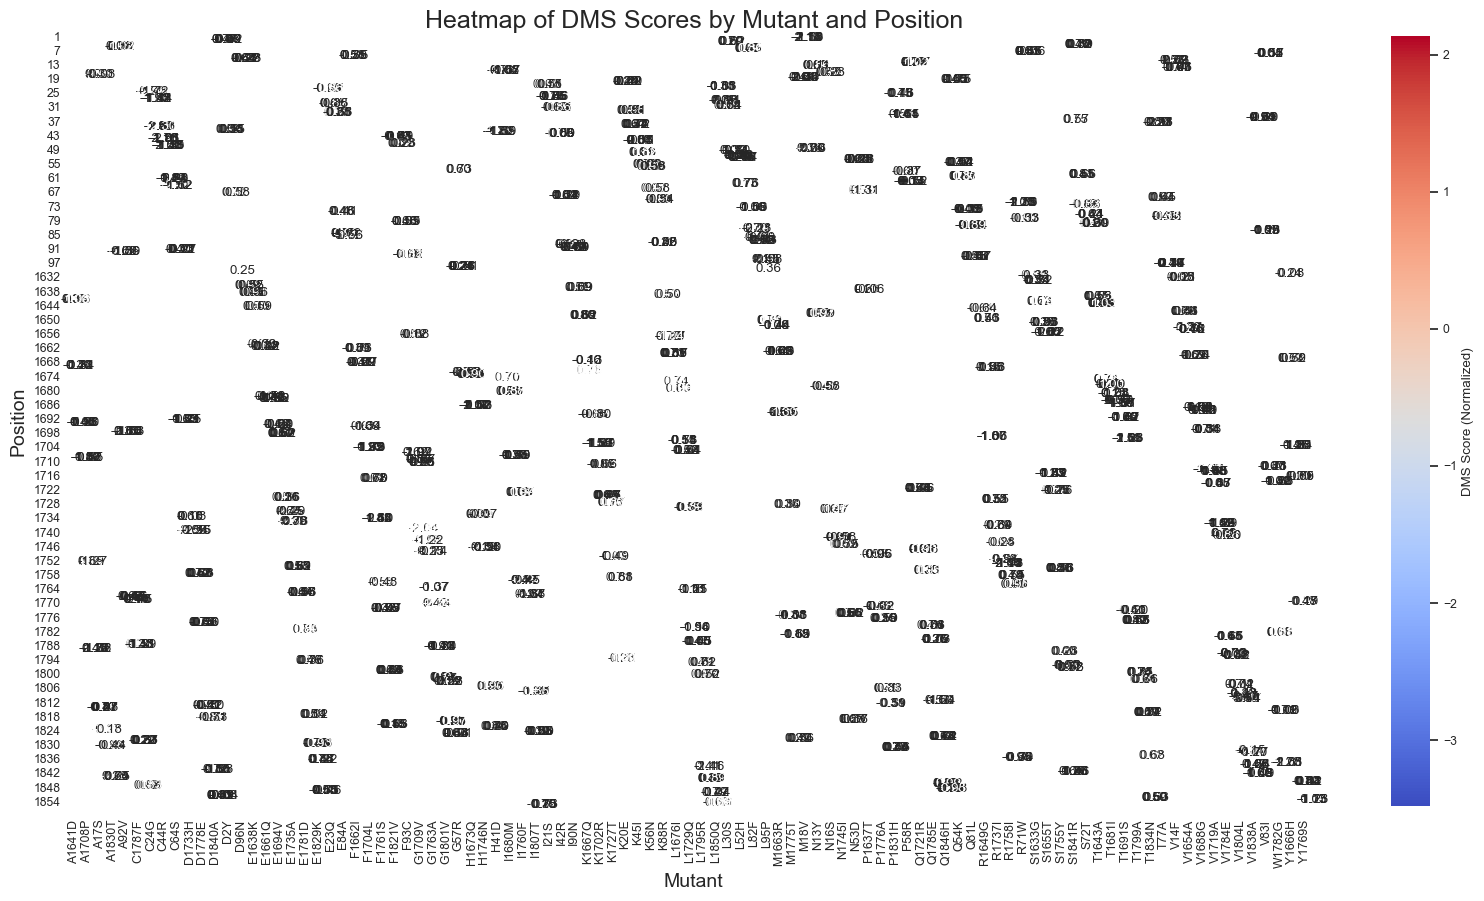

In [80]:
data_raw['DMS_score_normalized'] = (data_raw['DMS_score'] - data_raw['DMS_score'].mean()) / data_raw['DMS_score'].std()

# Pivot table
table = data_raw.pivot(index='position', columns='mutant', values='DMS_score_normalized')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(table, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f", cbar_kws={'label': 'DMS Score (Normalized)'})
ax.set_title('Heatmap of DMS Scores by Mutant and Position', fontsize=18)
plt.xlabel('Mutant', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.show()

In [92]:
count = (grouped['DMS_score_bin'].nunique() == 1).values
count &= (grouped['DMS_score_bin'].unique() == 0).any()
num_positions = count.sum()

print(f"There are {num_positions} positions that always have a DMS_score_bin of 0.")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [93]:
# Define a dictionary that maps amino acid letters to integers
aa_dict = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}

# Convert the protein sequence into a matrix of one-hot encoded vectors
def one_hot_encode(sequence):
    seq_matrix = np.zeros((len(sequence), 20))
    for i, aa in enumerate(sequence):
        if aa in aa_dict:
            seq_matrix[i, aa_dict[aa]] = 1
    return seq_matrix

# Apply one-hot encoding to the 'mutated_sequence' column
sequences = df['mutated_sequence'].apply(one_hot_encode).tolist()

# Combine the one-hot encoded matrices into a 3D tensor
X = np.stack(sequences)

# Print the shape of the tensor
print(X.shape)


(1837, 1863, 20)


In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Create a one-hot encoding of the sequences
def one_hot_encode(sequence):
    nucleotides = ['A', 'C', 'G', 'T']
    encoding = np.zeros((len(sequence), len(nucleotides)))
    for i, nt in enumerate(sequence):
        if nt in nucleotides:
            encoding[i, nucleotides.index(nt)] = 1
    return encoding

data_raw['sequence_onehot'] = data_raw['mutated_sequence'].apply(one_hot_encode)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    np.stack(data_raw['sequence_onehot']), 
    data_raw['DMS_score_normalized'], 
    test_size=0.2, 
    random_state=42
)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9828 - val_loss: 1.0764
Epoch 2/100
46/46 [==============================] - 1s 12ms/step - loss: 0.9813 - val_loss: 1.0760
Epoch 3/100
46/46 [==============================] - 1s 12ms/step - loss: 0.9809 - val_loss: 1.0761
Epoch 4/100
46/46 [==============================] - 1s 12ms/step - loss: 0.9808 - val_loss: 1.0760
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 0.9808 - val_loss: 1.0762
Epoch 6/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9806 - val_loss: 1.0760
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9805 - val_loss: 1.0760
Epoch 8/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9805 - val_loss: 1.0761
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 0.9805 - val_loss: 1.0761
Epoch 10/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9805 - val_loss: 1.0760

46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0759
Epoch 83/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9807 - val_loss: 1.0759
Epoch 84/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 85/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9805 - val_loss: 1.0760
Epoch 86/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0761
Epoch 87/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0760
Epoch 88/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 89/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0760
Epoch 90/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 91/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epo

In [95]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 1.2 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 1.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━

In [102]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
print(history.history)

Epoch 1/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 2/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0761
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 4/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0761
Epoch 6/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0761
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0760
Epoch 8/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9806 - val_loss: 1.0760
Epoch 9/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 10/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760

46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0761
Epoch 83/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 84/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 85/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9803 - val_loss: 1.0760
Epoch 86/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0761
Epoch 87/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9805 - val_loss: 1.0760
Epoch 88/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0760
Epoch 89/100
46/46 [==============================] - 1s 13ms/step - loss: 0.9803 - val_loss: 1.0761
Epoch 90/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0760
Epoch 91/100
46/46 [==============================] - 1s 14ms/step - loss: 0.9804 - val_loss: 1.0761
Epo

In [108]:
data_raw

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position,DMS_score_normalized,dms_score_normalized,sequence_onehot
0,M1I,IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.502128,0,1,-2.123843,-2.123843,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1,M1V,VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.025645,0,1,-1.591179,-1.591179,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
2,M1T,TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-1.656569,0,1,-1.178586,-1.178586,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [..."
3,M1R,RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.481580,0,1,-2.100871,-2.100871,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
4,M1L,LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-2.516529,0,1,-2.139942,-2.139942,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
...,...,...,...,...,...,...,...,...
1832,I1855R,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.464328,1,1855,0.154228,0.154228,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1833,I1855M,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.021941,1,1855,0.697831,0.697831,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1834,I1855L,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,0.233297,1,1855,0.934108,0.934108,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1835,I1855K,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...,-0.863844,1,1855,-0.292393,-0.292393,"[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
